<a href="https://colab.research.google.com/github/manjotmb20/tweet-analysis/blob/master/mlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [0]:
df=pd.read_csv("tweets.csv")

In [137]:
df.dtypes

Unnamed: 0                      object
tweet_text                      object
creation_time                   object
num_hashtags                   float64
num_symbols                    float64
num_user_mentions              float64
num_urls                       float64
retweet_count                  float64
favorite_count                  object
source                          object
lang                            object
source_user_followers_count    float64
source_user_friends_count      float64
source_user_statuses_count      object
source_user_geo_enabled         object
source_user_verified            object
label                           object
dtype: object

In [0]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i, '',input_text)
  return input_text  


In [0]:
clean_tweet=[]
for row in df["tweet_text"]:
  clean_tweet.append(np.vectorize(remove_pattern)(row,"@[\w]*"))

In [0]:
df["clean_tweet"]=clean_tweet

In [141]:
!pip install tweet-preprocessor

In [0]:
import preprocessor as p

In [0]:
c=type(None)
index=0
def urlpresent(input_text):
  t_parse=p.parse(input_text)
  if type(t_parse.urls) is not c:
    index=1
  else:
    index=0
  return index
  

In [0]:
test=df["clean_tweet"][0]

In [145]:
type(test)

numpy.ndarray

In [0]:
tlist=[]
for row in df["tweet_text"]:
  tlist.append(urlpresent(row))
df["url_present"] =tlist 

In [0]:
df.drop('creation_time',axis=1,inplace=True)

In [148]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,clean_tweet,url_present
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,"URL schemes that Sileo supports, so you can be...",0
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,RT : Never compare your life to others. You ha...,0
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,1
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,"#Meeseva Apply, Online, Centers, Services, App...",1
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,RT : Ceux qui n'étaient présents à l'hommage n...,0


In [149]:
y="Sneak Attack on Skybas #Fortnite #GameofGame"

t=p.parse(y)
type(t.emojis)

NoneType

In [0]:
c=type(None)
index=""
def emojipresent(input_text):
  t_parse=p.parse(input_text)
  if type(t_parse.emojis) is not c:
    index="Emoji"
  else:
    index="NoEmoji"
  return index

In [0]:
tlist=[]
for row in df["tweet_text"]:
  tlist.append(emojipresent(row))
df["emoji_present"] =tlist 

In [152]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,clean_tweet,url_present,emoji_present
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,"URL schemes that Sileo supports, so you can be...",0,NoEmoji
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,RT : Never compare your life to others. You ha...,0,NoEmoji
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,1,Emoji
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,"#Meeseva Apply, Online, Centers, Services, App...",1,NoEmoji
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,RT : Ceux qui n'étaient présents à l'hommage n...,0,NoEmoji


In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [0]:
plist=[]
for row in df["tweet_text"]:
  plist.append(remove_pattern(row,"@[\w]*"))
df["clean_text"]=plist

In [155]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,clean_tweet,url_present,emoji_present,clean_text
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,"URL schemes that Sileo supports, so you can be...",0,NoEmoji,"URL schemes that Sileo supports, so you can be..."
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,RT : Never compare your life to others. You ha...,0,NoEmoji,RT : Never compare your life to others. You ha...
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,1,Emoji,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,"#Meeseva Apply, Online, Centers, Services, App...",1,NoEmoji,"#Meeseva Apply, Online, Centers, Services, App..."
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,RT : Ceux qui n'étaient présents à l'hommage n...,0,NoEmoji,RT : Ceux qui n'étaient présents à l'hommage n...


In [0]:
df.drop("clean_tweet",axis=1,inplace=True)

In [0]:
df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z#]", " ")

In [158]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present,clean_text
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,0,NoEmoji,URL schemes that Sileo supports so you can be...
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,0,NoEmoji,RT Never compare your life to others You ha...
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,1,Emoji,Sneak Attack on Skybase #Fortnite #GameofGam...
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,1,NoEmoji,#Meeseva Apply Online Centers Services App...
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,0,NoEmoji,RT Ceux qui n taient pr sents l hommage n...


In [159]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present,clean_text
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,0,NoEmoji,URL schemes that Sileo supports so you can be...
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,0,NoEmoji,RT Never compare your life to others You ha...
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,1,Emoji,Sneak Attack on Skybase #Fortnite #GameofGam...
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,1,NoEmoji,#Meeseva Apply Online Centers Services App...
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,0,NoEmoji,RT Ceux qui n taient pr sents l hommage n...


In [0]:
df=df[df.lang=='en']

In [161]:
len(df)

7352

In [162]:
df.isnull().sum()

Unnamed: 0                     0
tweet_text                     0
num_hashtags                   0
num_symbols                    0
num_user_mentions              0
num_urls                       0
retweet_count                  0
favorite_count                 0
source                         0
lang                           0
source_user_followers_count    0
source_user_friends_count      0
source_user_statuses_count     0
source_user_geo_enabled        0
source_user_verified           0
label                          0
url_present                    0
emoji_present                  0
clean_text                     0
dtype: int64

In [0]:
df.dropna(inplace=True)

In [163]:
len(df)

7352

In [88]:
f=df[df.lang=='de'].label=='Collusive'
len(f)

67

In [89]:
count=0
for i in f:
  if i== True:
    count=count+1
print(count)    

44


In [0]:
df=df.drop(307,axis=0)

In [91]:
df.head()

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present,clean_text
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,0,NoEmoji,URL schemes that Sileo supports so you can be...
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,0,NoEmoji,RT Never compare your life to others You ha...
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,1,Emoji,Sneak Attack on Skybase #Fortnite #GameofGam...
3,3,"#Meeseva Apply, Online, Centers, Services, App...",1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive,1,NoEmoji,#Meeseva Apply Online Centers Services App...
4,4,RT @Linformatrice: Ceux qui n'étaient présents...,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine,0,NoEmoji,RT Ceux qui n taient pr sents l hommage n...


In [164]:
df.columns

Index(['Unnamed: 0', 'tweet_text', 'num_hashtags', 'num_symbols',
       'num_user_mentions', 'num_urls', 'retweet_count', 'favorite_count',
       'source', 'lang', 'source_user_followers_count',
       'source_user_friends_count', 'source_user_statuses_count',
       'source_user_geo_enabled', 'source_user_verified', 'label',
       'url_present', 'emoji_present', 'clean_text'],
      dtype='object')

In [165]:
def word_count(sentence):
    return len(sentence.split())
    
df['word_count'] = df['clean_text'].apply(word_count)
df.head(3)

,Unnamed: 0,tweet_text,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present,clean_text,word_count
0,0,"URL schemes that Sileo supports, so you can be...",0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive,0,NoEmoji,URL schemes that Sileo supports so you can be...,27
1,1,RT @TheLifeDiaries: Never compare your life to...,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine,0,NoEmoji,RT Never compare your life to others You ha...,17
2,2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive,1,Emoji,Sneak Attack on Skybase #Fortnite #GameofGam...,12


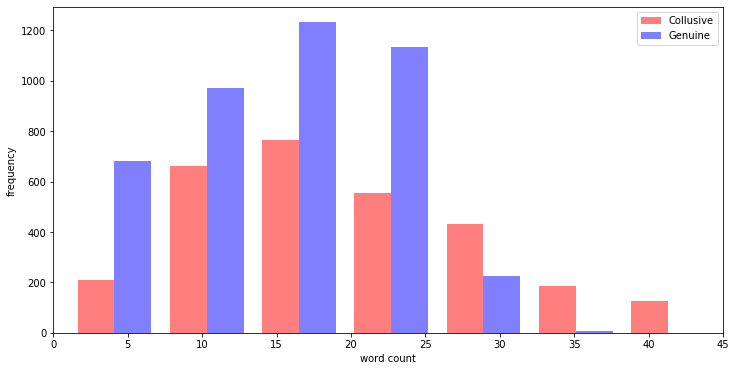

In [166]:
x = df['word_count'][df.label == 'Collusive']
y = df['word_count'][df.label == 'Genuine']
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['Collusive','Genuine'])
plt.legend(loc='upper right')

In [0]:
df.drop(['Unnamed: 0','tweet_text','clean_text','word_count','lang'],axis=1,inplace=True)

In [173]:
df.head()

,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present,source_new
0,0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",2032.0,309.0,9866,True,False,Collusive,0,NoEmoji,Twitter for Android
1,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",202.0,368.0,628,False,False,Genuine,0,NoEmoji,Twitter for iPhone
2,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",324.0,796.0,103,False,False,Collusive,1,Emoji,Twitter for Android
3,1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",57.0,1640.0,249,False,False,Collusive,1,NoEmoji,Twitter Web Client
5,0.0,0.0,1.0,0.0,6476.0,0,"<a href=""http://twitter.com/download/iphone"" r...",419.0,1586.0,11135,True,False,Genuine,0,Emoji,Twitter for iPhone


In [170]:
len(df)

7352

In [0]:
source_list=[]
for row in df.source:
  source_list.append(BeautifulSoup(row).string)
df['source_new']=source_list  

In [172]:
len(df.source_new.unique())

220

In [0]:
df.drop(['source','source_new'],axis=1,inplace=True)

In [101]:
df.describe()

,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,source_user_followers_count,source_user_friends_count,url_present,word_count
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000
mean,1.095129,0.002801,0.699910,0.489247,1361.391317,1.228554e+05,6759.088827,0.663799,16.623187
std,2.528955,0.081208,1.309144,0.571262,16448.131208,1.391078e+06,51787.903595,0.472432,9.955993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.110000e+02,148.000000,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,1.006000e+03,526.000000,1.000000,16.000000
75%,1.000000,0.000000,1.000000,1.000000,31.000000,6.043000e+03,1469.000000,1.000000,22.000000
max,30.000000,4.000000,46.000000,6.000000,457650.000000,3.900518e+07,982196.000000,1.000000,86.000000


In [176]:
len(df[df.label=='Collusive'])

3105

In [0]:
sc=StandardScaler()
df[['source_user_followers_count']]=sc.fit_transform(df[['source_user_followers_count']])
sc1=StandardScaler()
df[['source_user_friends_count']]=sc1.fit_transform(df[['source_user_friends_count']])
sc2=StandardScaler()
df[['retweet_count']]=sc2.fit_transform(df[['retweet_count']])
sc3=StandardScaler()
df[['favorite_count']]=sc.fit_transform(df[['favorite_count']])
sc4=StandardScaler()
df[['num_hashtags']]=sc4.fit_transform(df[['num_hashtags']])
sc5=StandardScaler()
df[['num_user_mentions']]=sc.fit_transform(df[['num_user_mentions']])
sc=StandardScaler()
df[['source_user_statuses_count']]=sc.fit_transform(df[['source_user_statuses_count']])

In [182]:
df.head()

,num_hashtags,num_user_mentions,num_urls,retweet_count,favorite_count,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label,url_present,emoji_present
0,-0.450270,-0.573579,0.0,-0.093849,-0.024897,-0.092310,-0.131667,-0.146722,True,False,Collusive,0,NoEmoji
1,-0.450270,0.193000,0.0,0.006051,-0.031539,-0.093590,-0.130460,-0.349166,False,False,Genuine,0,NoEmoji
2,0.828200,-0.573579,0.0,-0.094141,-0.029611,-0.093505,-0.121707,-0.360671,False,False,Collusive,1,Emoji
3,-0.024113,-0.573579,1.0,-0.079508,-0.024254,-0.093691,-0.104445,-0.357472,False,False,Collusive,1,NoEmoji
5,-0.450270,0.193000,0.0,0.536770,-0.031539,-0.093438,-0.105549,-0.118912,True,False,Genuine,0,Emoji


In [0]:
lc=LabelEncoder()
df['lang']=lc.fit_transform(df['lang'])

In [0]:
lc1=LabelEncoder()
df['source_user_geo_enabled']=lc1.fit_transform(df['source_user_geo_enabled'])
lc2=LabelEncoder()
df['source_user_verified']=lc2.fit_transform(df['source_user_verified'])
lc3=LabelEncoder()
df['source_user_geo_enabled']=lc3.fit_transform(df['source_user_geo_enabled'])
lc4=LabelEncoder()
df['emoji_present']=lc4.fit_transform(df['emoji_present'])


In [0]:
df.drop('num_symbols',axis=1,inplace=True)

In [0]:
y=df['label']

In [185]:
len(y)

7352

In [0]:
df.drop('label',axis=1,inplace=True)

In [0]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(df,y,test_size=0.2,random_state=9)

In [189]:
df.head()

,num_hashtags,num_user_mentions,num_urls,retweet_count,favorite_count,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,url_present,emoji_present
0,-0.450270,-0.573579,0.0,-0.093849,-0.024897,-0.092310,-0.131667,-0.146722,1,0,0,1
1,-0.450270,0.193000,0.0,0.006051,-0.031539,-0.093590,-0.130460,-0.349166,0,0,0,1
2,0.828200,-0.573579,0.0,-0.094141,-0.029611,-0.093505,-0.121707,-0.360671,0,0,1,0
3,-0.024113,-0.573579,1.0,-0.079508,-0.024254,-0.093691,-0.104445,-0.357472,0,0,1,1
5,-0.450270,0.193000,0.0,0.536770,-0.031539,-0.093438,-0.105549,-0.118912,1,0,0,0


In [190]:
clf3=xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective='binary:logistic',n_thread=4,scale_pos_weight=1)
clf3.fit(x_train,y_train)
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf1=GaussianNB()
clf1.fit(x_train,y_train)
clf4=DecisionTreeClassifier()
clf4.fit(x_train,y_train)
clf5=RandomForestClassifier()
clf5.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf4.predict(x_val)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [203]:
accuracy_score(y_val,y_pred)

0.8987083616587356